In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('ml-league').getOrCreate()
df = spark.read.csv('hdfs://namenode/game.csv', header = True, inferSchema = True)
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- matchId: double (nullable = true)
 |-- blue_win: integer (nullable = true)
 |-- blueGold: double (nullable = true)
 |-- blueMinionsKilled: double (nullable = true)
 |-- blueJungleMinionsKilled: double (nullable = true)
 |-- blueAvgLevel: double (nullable = true)
 |-- redGold: double (nullable = true)
 |-- redMinionsKilled: double (nullable = true)
 |-- redJungleMinionsKilled: double (nullable = true)
 |-- redAvgLevel: double (nullable = true)
 |-- blueChampKills: double (nullable = true)
 |-- blueHeraldKills: double (nullable = true)
 |-- blueDragonKills: double (nullable = true)
 |-- blueTowersDestroyed: double (nullable = true)
 |-- redChampKills: double (nullable = true)
 |-- redHeraldKills: double (nullable = true)
 |-- redDragonKills: double (nullable = true)
 |-- redTowersDestroyed: double (nullable = true)



In [2]:
import pandas as pd
pd.DataFrame(df.take(5), columns=df.columns)

,_c0,matchId,blue_win,blueGold,blueMinionsKilled,blueJungleMinionsKilled,blueAvgLevel,redGold,redMinionsKilled,redJungleMinionsKilled,redAvgLevel,blueChampKills,blueHeraldKills,blueDragonKills,blueTowersDestroyed,redChampKills,redHeraldKills,redDragonKills,redTowersDestroyed
0,0,3.493251e+09,0,24575.0,349.0,89.0,8.6,25856.0,346.0,80.0,9.2,6.0,1.0,0.0,1.0,12.0,2.0,0.0,1.0
1,1,3.464936e+09,0,27210.0,290.0,36.0,9.0,28765.0,294.0,92.0,9.4,20.0,0.0,0.0,0.0,19.0,2.0,0.0,0.0
2,2,3.428426e+09,1,32048.0,346.0,92.0,9.4,25305.0,293.0,84.0,9.4,17.0,3.0,0.0,0.0,11.0,0.0,0.0,4.0
3,3,3.428347e+09,0,20261.0,223.0,60.0,8.2,30429.0,356.0,107.0,9.4,7.0,0.0,0.0,3.0,16.0,3.0,0.0,0.0
4,4,3.428351e+09,1,30217.0,376.0,110.0,9.8,23889.0,334.0,60.0,8.8,16.0,3.0,0.0,0.0,8.0,0.0,0.0,2.0


In [3]:
dup = df.dropDuplicates()
print(f"Removed {df.count()-dup.count()} duplicated rows ")

null = dup.na.drop()
print(f"Removed {dup.count()-null.count()} null rows ")

Removed 0 duplicated rows 
Removed 0 null rows 


In [4]:
df.groupby('blue_win').count().toPandas()

,blue_win,count
0,1,24589
1,0,24062


The data is found well balanced

In [5]:
df = df.select('blue_win', 'blueGold', 'blueMinionsKilled', 'blueJungleMinionsKilled', 'blueAvgLevel', 'redGold', 'redMinionsKilled', 'redJungleMinionsKilled', 'redAvgLevel', 'blueChampKills', 'blueHeraldKills', 'blueDragonKills', 'blueTowersDestroyed', 'redChampKills', 'redHeraldKills', 'redDragonKills', 'redTowersDestroyed')
cols = df.columns
df.printSchema()

root
 |-- blue_win: integer (nullable = true)
 |-- blueGold: double (nullable = true)
 |-- blueMinionsKilled: double (nullable = true)
 |-- blueJungleMinionsKilled: double (nullable = true)
 |-- blueAvgLevel: double (nullable = true)
 |-- redGold: double (nullable = true)
 |-- redMinionsKilled: double (nullable = true)
 |-- redJungleMinionsKilled: double (nullable = true)
 |-- redAvgLevel: double (nullable = true)
 |-- blueChampKills: double (nullable = true)
 |-- blueHeraldKills: double (nullable = true)
 |-- blueDragonKills: double (nullable = true)
 |-- blueTowersDestroyed: double (nullable = true)
 |-- redChampKills: double (nullable = true)
 |-- redHeraldKills: double (nullable = true)
 |-- redDragonKills: double (nullable = true)
 |-- redTowersDestroyed: double (nullable = true)



In [6]:
numeric_features = [t[0] for t in df.dtypes if t[1] == 'double']
df.select(numeric_features).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
blueGold,48651,26349.16057223901,2777.2998677544165,15930.0,39769.0
blueMinionsKilled,48651,335.8591395860311,32.67309558960828,120.0,455.0
blueJungleMinionsKilled,48651,83.13658506505519,14.794947466946063,0.0,164.0
blueAvgLevel,48651,9.17225134118565,0.41373488268088915,5.4,10.8
redGold,48651,26203.02859139586,2754.7094253129667,11133.0,39999.0
redMinionsKilled,48651,336.69398367967773,33.2789623119406,14.0,457.0
redJungleMinionsKilled,48651,84.69299706069762,14.902325776460577,1.0,160.0
redAvgLevel,48651,9.174758997760078,0.4213960073984547,2.4,10.6
blueChampKills,48651,11.013154919734435,4.53289808776087,0.0,50.0


Select data columns in double type and check their relevance.

/opt/conda/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/opt/conda/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/opt/conda/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


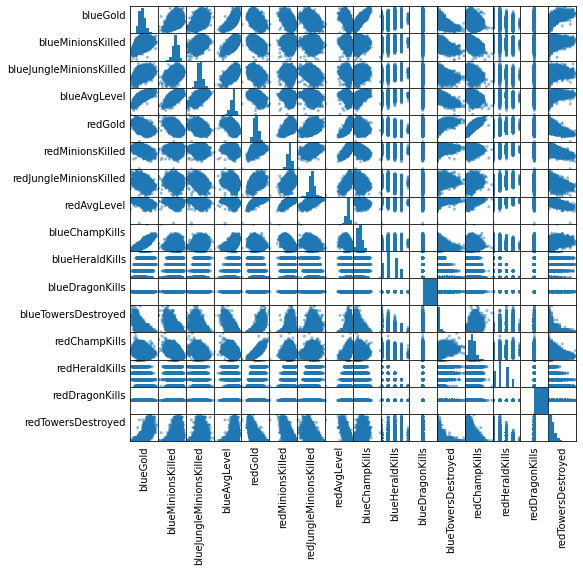

In [7]:
numeric_data = df.select(numeric_features).toPandas()
axs = pd.plotting.scatter_matrix(numeric_data, figsize=(8, 8));

# Rotate axis labels and remove axis ticks
n = len(numeric_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

Based on the plots shown above, we remove the column of DragonKills and HeraldKills for both teams.

In [8]:
# remove dragons kills & herald kills
df = df.select('blue_win', 'blueGold', 'blueMinionsKilled', 'blueJungleMinionsKilled', 'blueAvgLevel', 'redGold', 'redMinionsKilled', 'redJungleMinionsKilled', 'redAvgLevel', 'blueChampKills', 'blueTowersDestroyed', 'redChampKills', 'redTowersDestroyed')
cols = df.columns
df.printSchema()

root
 |-- blue_win: integer (nullable = true)
 |-- blueGold: double (nullable = true)
 |-- blueMinionsKilled: double (nullable = true)
 |-- blueJungleMinionsKilled: double (nullable = true)
 |-- blueAvgLevel: double (nullable = true)
 |-- redGold: double (nullable = true)
 |-- redMinionsKilled: double (nullable = true)
 |-- redJungleMinionsKilled: double (nullable = true)
 |-- redAvgLevel: double (nullable = true)
 |-- blueChampKills: double (nullable = true)
 |-- blueTowersDestroyed: double (nullable = true)
 |-- redChampKills: double (nullable = true)
 |-- redTowersDestroyed: double (nullable = true)



In [9]:
numeric_features = [t[0] for t in df.dtypes if t[1] == 'double']
df.select(numeric_features).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
blueGold,48651,26349.16057223901,2777.2998677544165,15930.0,39769.0
blueMinionsKilled,48651,335.8591395860311,32.67309558960828,120.0,455.0
blueJungleMinionsKilled,48651,83.13658506505519,14.794947466946063,0.0,164.0
blueAvgLevel,48651,9.17225134118565,0.41373488268088915,5.4,10.8
redGold,48651,26203.02859139586,2754.7094253129667,11133.0,39999.0
redMinionsKilled,48651,336.69398367967773,33.2789623119406,14.0,457.0
redJungleMinionsKilled,48651,84.69299706069762,14.902325776460577,1.0,160.0
redAvgLevel,48651,9.174758997760078,0.4213960073984547,2.4,10.6
blueChampKills,48651,11.013154919734435,4.53289808776087,0.0,50.0


In [10]:
# numeric_data = df.select(numeric_features).toPandas()
# axs = pd.plotting.scatter_matrix(numeric_data, figsize=(8, 8));

# # Rotate axis labels and remove axis ticks
# n = len(numeric_data.columns)
# for i in range(n):
#     v = axs[i, 0]
#     v.yaxis.label.set_rotation(0)
#     v.yaxis.label.set_ha('right')
#     v.set_yticks(())
#     h = axs[n-1, i]
#     h.xaxis.label.set_rotation(90)
#     h.set_xticks(())

In [11]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
label_stringIdx = StringIndexer(inputCol = 'blue_win', outputCol = 'label')
stages = [label_stringIdx]

assembler = VectorAssembler(inputCols=numeric_features, outputCol="features")
stages += [assembler]

In [12]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df)
df = pipelineModel.transform(df)
selectedCols = ['label', 'features'] + cols
df = df.select(selectedCols)
df.printSchema()

root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- blue_win: integer (nullable = true)
 |-- blueGold: double (nullable = true)
 |-- blueMinionsKilled: double (nullable = true)
 |-- blueJungleMinionsKilled: double (nullable = true)
 |-- blueAvgLevel: double (nullable = true)
 |-- redGold: double (nullable = true)
 |-- redMinionsKilled: double (nullable = true)
 |-- redJungleMinionsKilled: double (nullable = true)
 |-- redAvgLevel: double (nullable = true)
 |-- blueChampKills: double (nullable = true)
 |-- blueTowersDestroyed: double (nullable = true)
 |-- redChampKills: double (nullable = true)
 |-- redTowersDestroyed: double (nullable = true)



# Normalization
Different attributes of the data may have various scales. The difference in orders of magnitude can lead to unbalanced effect to during the model training, thus we need to normalize the data to resolve this issue. In this case, min-max normalization is applied.

In [13]:
# Standardization
from pyspark.ml.feature import MinMaxScaler
scale = MinMaxScaler(inputCol='features', outputCol='new_features')
scaler = scale.fit(df)
scaled = scaler.transform(df)
scaled.show(2)

+-----+--------------------+--------+--------+-----------------+-----------------------+------------+-------+----------------+----------------------+-----------+--------------+-------------------+-------------+------------------+--------------------+
|label|            features|blue_win|blueGold|blueMinionsKilled|blueJungleMinionsKilled|blueAvgLevel|redGold|redMinionsKilled|redJungleMinionsKilled|redAvgLevel|blueChampKills|blueTowersDestroyed|redChampKills|redTowersDestroyed|        new_features|
+-----+--------------------+--------+--------+-----------------+-----------------------+------------+-------+----------------+----------------------+-----------+--------------+-------------------+-------------+------------------+--------------------+
|  1.0|[24575.0,349.0,89...|       0| 24575.0|            349.0|                   89.0|         8.6|25856.0|           346.0|                  80.0|        9.2|           6.0|                1.0|         12.0|               1.0|[0.36264105037963.

In [14]:
pd.DataFrame(scaled.take(5), columns=scaled.columns).transpose()

,0,1,2,3,4
label,1,1,0,1,0
features,"[24575.0, 349.0, 89.0, 8.6, 25856.0, 346.0, 80...","[27210.0, 290.0, 36.0, 9.0, 28765.0, 294.0, 92...","[32048.0, 346.0, 92.0, 9.4, 25305.0, 293.0, 84...","[20261.0, 223.0, 60.0, 8.2, 30429.0, 356.0, 10...","[30217.0, 376.0, 110.0, 9.8, 23889.0, 334.0, 6..."
blue_win,0,0,1,0,1
blueGold,24575,27210,32048,20261,30217
blueMinionsKilled,349,290,346,223,376
blueJungleMinionsKilled,89,36,92,60,110
blueAvgLevel,8.6,9,9.4,8.2,9.8
redGold,25856,28765,25305,30429,23889
redMinionsKilled,346,294,293,356,334
redJungleMinionsKilled,80,92,84,107,60


In [15]:
train, test = scaled.randomSplit([0.8, 0.2], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 39001
Test Dataset Count: 9650


# Logistic regression (classification)
After the model is fully trained, the winning rate of both teams can be predicted according to the relevant data in the game.

In [16]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(featuresCol = 'new_features', labelCol = 'label', maxIter=10)
lrModel = lr.fit(train)

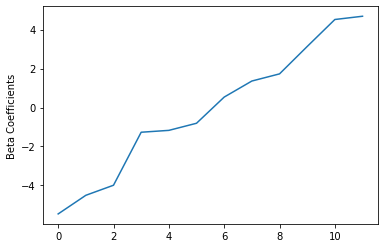

In [17]:
import matplotlib.pyplot as plt
import numpy as np

beta = np.sort(lrModel.coefficients)

plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

In [18]:
predictions = lrModel.transform(test)
predictions.select('label', 'rawPrediction', 'prediction', 'probability').show(10)

+-----+--------------------+----------+--------------------+
|label|       rawPrediction|prediction|         probability|
+-----+--------------------+----------+--------------------+
|  0.0|[-3.5976123333310...|       1.0|[0.02665887921806...|
|  0.0|[-2.1257044963154...|       1.0|[0.10662346861653...|
|  0.0|[-2.7489146190933...|       1.0|[0.06014797768786...|
|  0.0|[-3.3238525674751...|       1.0|[0.03476190938653...|
|  0.0|[-1.4534302103108...|       1.0|[0.18947421459938...|
|  0.0|[-3.4027773514694...|       1.0|[0.03220877827112...|
|  0.0|[-1.4034772972306...|       1.0|[0.19726489664946...|
|  0.0|[-2.1633516229625...|       1.0|[0.10309013929531...|
|  0.0|[-3.7499579010359...|       1.0|[0.02297831502592...|
|  0.0|[-1.6654381151386...|       1.0|[0.15903334467999...|
+-----+--------------------+----------+--------------------+
only showing top 10 rows



One thing to mention is that the label and the blue_win attribute is present in a opposite way...But it does not matter and have no negative effect for the training and prediction process.

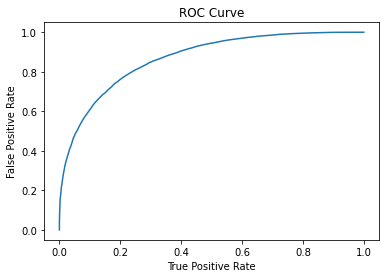

Training set areaUnderROC: 0.8677051580958487


In [19]:
trainingSummary = lrModel.summary

roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

In [20]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.8726256217582918


The classification performance is good.

# Decision tree

In [21]:
from pyspark.ml.classification import DecisionTreeClassifier

dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(train)
predictions = dtModel.transform(test)
predictions.select('label', 'rawPrediction', 'prediction', 'probability').show(10)

+-----+----------------+----------+--------------------+
|label|   rawPrediction|prediction|         probability|
+-----+----------------+----------+--------------------+
|  0.0|[2371.0,11425.0]|       1.0|[0.17186140910408...|
|  0.0| [1137.0,1825.0]|       1.0|[0.38386225523295...|
|  0.0|[2371.0,11425.0]|       1.0|[0.17186140910408...|
|  0.0|[2371.0,11425.0]|       1.0|[0.17186140910408...|
|  0.0| [1137.0,1825.0]|       1.0|[0.38386225523295...|
|  0.0|[2371.0,11425.0]|       1.0|[0.17186140910408...|
|  0.0| [1137.0,1825.0]|       1.0|[0.38386225523295...|
|  0.0| [1137.0,1825.0]|       1.0|[0.38386225523295...|
|  0.0|[2371.0,11425.0]|       1.0|[0.17186140910408...|
|  0.0| [1137.0,1825.0]|       1.0|[0.38386225523295...|
+-----+----------------+----------+--------------------+
only showing top 10 rows



In [22]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.7764492620530618


# Linear regression
In this part, linear regression model will be trained and applied on the data of blue team to predict the estimated number of killed enemy champions. Comparing the predicted and the fact number, the coaches can judge the team's style: conservative or aggressive, which can help tactical adjustments.

In [23]:
print(numeric_features)

['blueGold', 'blueMinionsKilled', 'blueJungleMinionsKilled', 'blueAvgLevel', 'redGold', 'redMinionsKilled', 'redJungleMinionsKilled', 'redAvgLevel', 'blueChampKills', 'blueTowersDestroyed', 'redChampKills', 'redTowersDestroyed']


In [24]:
blue = scaled.select('blueGold', 'blueMinionsKilled', 'blueJungleMinionsKilled', 'blueAvgLevel', 'blueChampKills', 'blueTowersDestroyed')
cols = blue.columns
blue.printSchema()

root
 |-- blueGold: double (nullable = true)
 |-- blueMinionsKilled: double (nullable = true)
 |-- blueJungleMinionsKilled: double (nullable = true)
 |-- blueAvgLevel: double (nullable = true)
 |-- blueChampKills: double (nullable = true)
 |-- blueTowersDestroyed: double (nullable = true)



In [25]:
from pyspark.ml.regression import LinearRegression
feature2 = ['blueGold', 'blueMinionsKilled', 'blueJungleMinionsKilled', 'blueAvgLevel', 'blueTowersDestroyed']

assembler1 = VectorAssembler(inputCols=feature2, outputCol="features2")
stages1 = [assembler1]

In [26]:
pipeline1 = Pipeline(stages = stages1)
pipelineModel1 = pipeline1.fit(blue)
blue = pipelineModel1.transform(blue)
selectedCols = ['features2'] + cols
blue = blue.select(selectedCols)
blue.printSchema()

root
 |-- features2: vector (nullable = true)
 |-- blueGold: double (nullable = true)
 |-- blueMinionsKilled: double (nullable = true)
 |-- blueJungleMinionsKilled: double (nullable = true)
 |-- blueAvgLevel: double (nullable = true)
 |-- blueChampKills: double (nullable = true)
 |-- blueTowersDestroyed: double (nullable = true)



In [27]:
blue_scale = MinMaxScaler(inputCol='features2', outputCol='new_features')
blue_scaler = blue_scale.fit(blue)
blue_scaled = blue_scaler.transform(blue)
blue_scaled.show(2)

+--------------------+--------+-----------------+-----------------------+------------+--------------+-------------------+--------------------+
|           features2|blueGold|blueMinionsKilled|blueJungleMinionsKilled|blueAvgLevel|blueChampKills|blueTowersDestroyed|        new_features|
+--------------------+--------+-----------------+-----------------------+------------+--------------+-------------------+--------------------+
|[24575.0,349.0,89...| 24575.0|            349.0|                   89.0|         8.6|           6.0|                1.0|[0.36264105037963...|
|[27210.0,290.0,36...| 27210.0|            290.0|                   36.0|         9.0|          20.0|                0.0|[0.47317421032761...|
+--------------------+--------+-----------------+-----------------------+------------+--------------+-------------------+--------------------+
only showing top 2 rows



In [28]:
pd.DataFrame(blue_scaled.take(5), columns=blue_scaled.columns).transpose()

,0,1,2,3,4
features2,"[24575.0, 349.0, 89.0, 8.6, 1.0]","[27210.0, 290.0, 36.0, 9.0, 0.0]","[32048.0, 346.0, 92.0, 9.4, 0.0]","[20261.0, 223.0, 60.0, 8.2, 3.0]","[30217.0, 376.0, 110.0, 9.8, 0.0]"
blueGold,24575,27210,32048,20261,30217
blueMinionsKilled,349,290,346,223,376
blueJungleMinionsKilled,89,36,92,60,110
blueAvgLevel,8.6,9,9.4,8.2,9.8
blueChampKills,6,20,17,7,16
blueTowersDestroyed,1,0,0,3,0
new_features,"[0.36264105037963, 0.6835820895522388, 0.54268...","[0.4731742103276144, 0.5074626865671642, 0.219...","[0.6761189647216745, 0.6746268656716418, 0.560...","[0.18167708377029237, 0.3074626865671642, 0.36...","[0.5993120516800201, 0.764179104477612, 0.6707..."


In [29]:
blue_train, blue_test = blue_scaled.randomSplit([0.8, 0.2], seed = 2018)
print("Training Dataset Count: " + str(blue_train.count()))
print("Test Dataset Count: " + str(blue_test.count()))

Training Dataset Count: 39001
Test Dataset Count: 9650


In [30]:
linear = LinearRegression(featuresCol = 'new_features', labelCol = 'blueChampKills')
linear_model = linear.fit(blue_train)
training_predictions = linear_model.evaluate(blue_train)
test_predictions = linear_model.evaluate(blue_test)
print(f'MSE of training set: {training_predictions.meanSquaredError}')
print(f'MSE of test set: {test_predictions.meanSquaredError}')

MSE of training set: 2.6699958490133953
MSE of test set: 2.5258230869046208


In [31]:
# The coefficient of determination (R²) measures how well a statistical model predicts an outcome. 
# The outcome is represented by the model's dependent variable. 
# The lowest possible value of R² is 0 and the highest possible value is 1.
print(f'Coefficient of determination of training set: {training_predictions.r2}')
print(f'Coefficient of determination of test set: {test_predictions.r2}')

Coefficient of determination of training set: 0.8708810368800202
Coefficient of determination of test set: 0.8737660249789073
